# Importando Bibliotecas

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [53]:
dados = pd.read_csv('dados/dados.csv')

In [54]:
dados.head()

,Distancia em cm,Distancia em polegadas
0,30.17,11.88
1,30.45,11.99
2,30.46,11.99
3,30.55,12.03
4,30.45,11.99


In [55]:
N = []
for i  in range(101):
    N.append(i)
dados['N'] = N

In [82]:
dados.set_index('N')

,Distancia em cm,Distancia em polegadas
N,,
0,30.17,11.88
1,30.45,11.99
2,30.46,11.99
3,30.55,12.03
4,30.45,11.99
...,...,...
96,30.55,12.03
97,30.45,11.99
98,30.55,12.03


In [57]:
dados.shape

(101, 3)

In [58]:
media_total = dados['Distancia em cm'].mean()
media_total

30.487920792079205

In [59]:
desvio_padrão = dados['Distancia em cm'].std()
desvio_padrão

0.07004736728362015

# Amostra

In [60]:
amostra = dados['Distancia em cm'].sample(10,random_state=101)

In [61]:
media_amostral = amostra.mean()
media


[30.483999999999998,
 30.482999999999997,
 30.48266666666667,
 30.5005,
 30.494600000000005,
 30.490500000000008,
 30.488714285714305,
 30.48362500000001,
 30.48577777777779,
 30.488300000000017]

In [62]:
desvio_amostra = amostra.std()
desvio_amostra

0.05501514942874122

In [63]:
media = []
std = []
for i in range(10):
    media.append(dados['Distancia em cm'].sample(10+ i*10,random_state=101).mean())
    std.append(dados['Distancia em cm'].sample(10+ i*10 ,random_state=101).std())
    

In [64]:
media

[30.483999999999998,
 30.482999999999997,
 30.48266666666667,
 30.5005,
 30.494600000000005,
 30.490500000000008,
 30.488714285714305,
 30.48362500000001,
 30.48577777777779,
 30.488300000000017]

In [65]:
std

[0.05501514942874122,
 0.04985241376197132,
 0.04813295761944669,
 0.07880355321938239,
 0.0735182887145113,
 0.0696096866432848,
 0.06760759387437514,
 0.07384972339534969,
 0.0719390781237737,
 0.07029598318912178]

In [66]:
amostras = { 'desvio_amostra' : std,
            'meida_amostral' : media}

In [67]:
media_std = pd.DataFrame(data=amostras)


In [68]:
media_std['N'] = [10,20,30,40,50,60,70,80,90,100]

In [85]:
media_std.set_index('N')

,desvio_amostra,meida_amostral
N,,
10,0.055015,30.484000
20,0.049852,30.483000
30,0.048133,30.482667
40,0.078804,30.500500
50,0.073518,30.494600
60,0.069610,30.490500
70,0.067608,30.488714
80,0.073850,30.483625
90,0.071939,30.485778


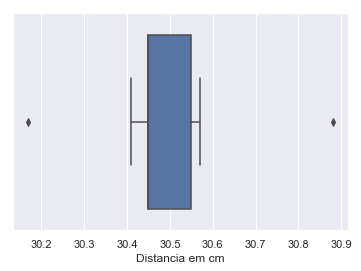

In [71]:
sns.boxplot(dados['Distancia em cm'])

In [86]:
dados.describe()

,Distancia em cm,Distancia em polegadas,N
count,101.000000,101.000000,101.000000
mean,30.487921,12.004851,50.000000
std,0.070047,0.028129,29.300171
min,30.170000,11.880000,0.000000
25%,30.450000,11.990000,25.000000
50%,30.450000,11.990000,50.000000
75%,30.550000,12.030000,75.000000
max,30.880000,12.160000,100.000000


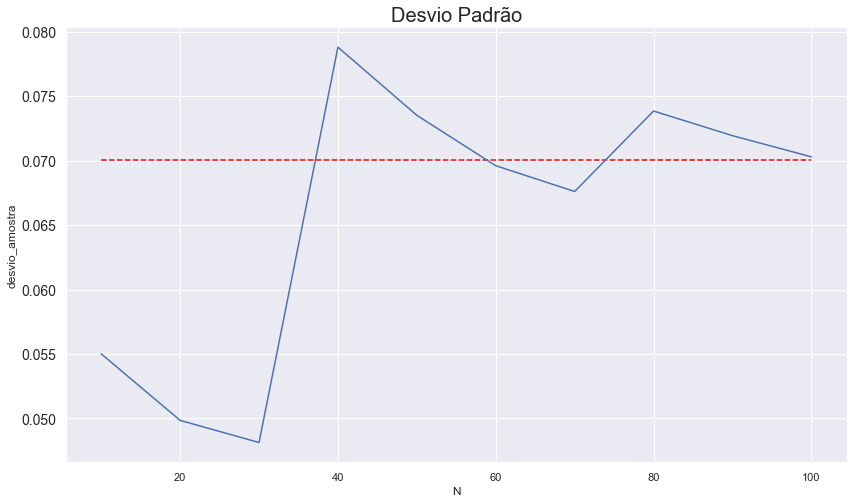

In [72]:
plt.close('all')
fig, ax = plt.subplots(figsize=(14, 8))
plt.title("Desvio Padrão", fontsize=20)
plt.yticks(fontsize=14)
ax.hlines(y = desvio_padrão, xmin = 10, xmax = 100, colors='red', linestyles='dashed')
sns.lineplot(x='N', y= 'desvio_amostra',ax= ax, data=media_std)


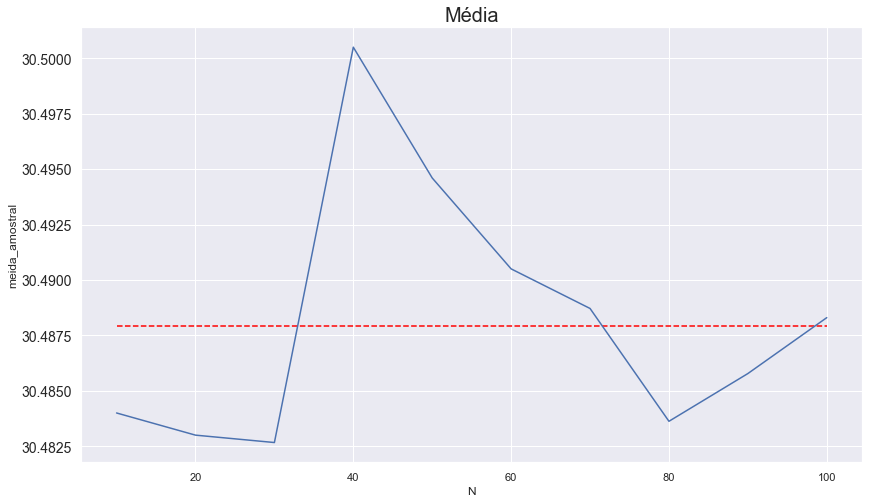

In [73]:
plt.close('all')
fig, ax = plt.subplots(figsize=(14, 8))
plt.title("Média", fontsize=20)
plt.yticks(fontsize=14)
ax.hlines(y = media_total, xmin = 10, xmax = 100, colors='red', linestyles='dashed')
sns.lineplot(x='N', y= 'meida_amostral',ax= ax, data=media_std)

# Resultado para N +1

In [74]:
media = []
std = []
for i in range(10):
    media.append(dados['Distancia em cm'].sample(10+ i*10,random_state=101).mean())
    std.append(dados['Distancia em cm'].sample(10+ i*10 + 1 ,random_state=101).std())

amostras = { 'desvio_amostra' : std,
            'meida_amostral' : media}

media_std_n1 = pd.DataFrame(data=amostras)
media_std_n1['N + 1'] = [11,21,31,41,51,61,71,81,91,101]

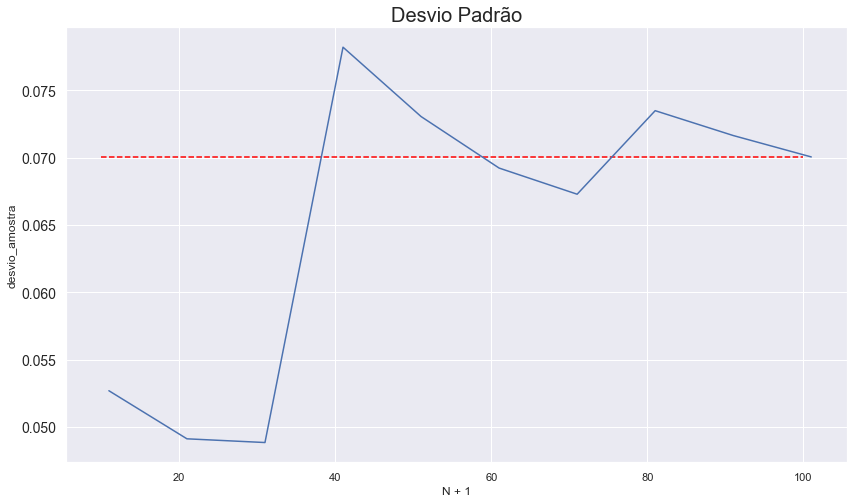

In [75]:
plt.close('all')
fig, ax = plt.subplots(figsize=(14, 8))
plt.title("Desvio Padrão", fontsize=20)
plt.yticks(fontsize=14)
ax.hlines(y = desvio_padrão, xmin = 10, xmax = 100, colors='red', linestyles='dashed')
sns.lineplot(x='N + 1', y= 'desvio_amostra',ax= ax, data=media_std_n1)

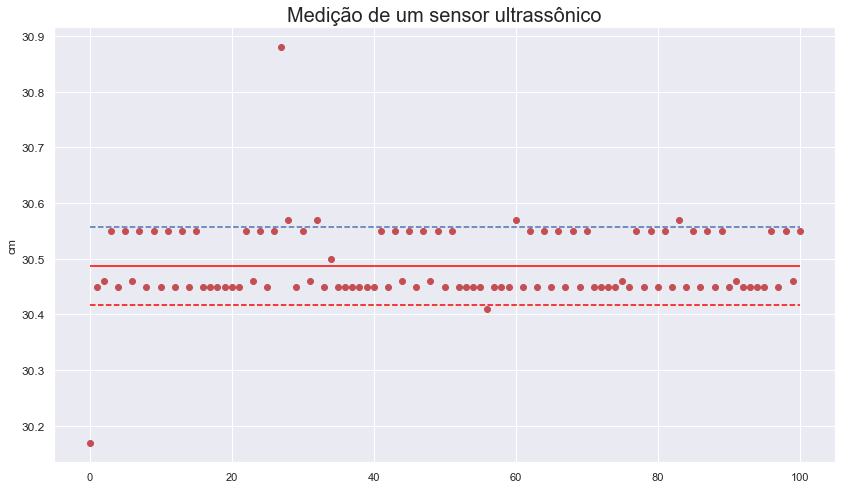

In [83]:
plt.close('all')
#sns.set(style="darkgrid")

fig, ax = plt.subplots(figsize=(14, 8))
plt.title("Medição de um sensor ultrassônico", fontsize=20)
ax.set_ylabel('cm')
plt.yticks(fontsize=12)
#sns.regplot(x='N', y= 'Distancia em cm',ax= ax, data=dados)
plt.plot(dados['N'],dados['Distancia em cm'],'ro')
ax.hlines(y = media_total, xmin = 0, xmax = 100, colors='red')
ax.hlines(y = media_total+ desvio_padrão, xmin = 0, xmax = 100, colors='b', linestyles='dashed')
ax.hlines(y = media_total - desvio_padrão, xmin = 0, xmax = 100, colors='red', linestyles='dashed')